# Exploring Monte Carlo Control on Blackjack RL environment

Author: Hayk Hovhannisyan<br>
Date: 16 May 2023<br>
BS in Data Science, American University of Armenia

---

**Abstract:**<br>

This notebook explores the application of Monte Carlo Control in a Reinforcement Learning (RL) environment for the game of Blackjack. 

**The goal:** <br>
Improve the policy function through an iterative process of simulation and evaluation.
 The implementation follows the methodology outlined by Sutton et al. in their book ["Reinforcement Learning: An Introduction"](http://incompleteideas.net/book/RLbook2020.pdf). 
 
 **RL Algorythm** <br>
 Monte Carlo Control is employed to estimate the state-action values, and an epsilon-greedy policy is used to balance exploration and exploitation. The study provides insights into the effectiveness of Monte Carlo Control in learning optimal policies for playing Blackjack and contributes to the field of RL and decision-making in uncertain environments.

 **Environment**
 The OpenAI Gym environment is utilized in this study. The Blackjack environment from the OpenAI Gym library is employed to simulate the game and interact with the RL agent.

 ---

In [1]:
from utils.utils import *
from utils.plot_utils import *

## Initializing environment
In this step we initialize openai gym environment

In [2]:
env = gym.make('Blackjack-v1')
state = env.reset()[0]

## MC algorythm
![monte](./media/monte.png)

---

Based on the pseudocode of MC Control algorythm below is implemented it in Python


In [3]:
from utils.utils import generate_episode

def monte_carlo_control(env, num_episodes, gamma, eps, eps_min, eps_decay):
    """
    Performs Monte Carlo Control algorithm to learn the optimal Q values for a given RL environment.

    Parameters:
        env (gym.Env): The RL environment to interact with.
        num_episodes (int): Number of episodes to run the Monte Carlo Control algorithm.
        gamma (float): Discount factor for future rewards.
        eps (float): Epsilon value for the epsilon-greedy policy.
        eps_min (float): Minimum epsilon value for exploration vs. exploitation.
        eps_decay (float): Decay factor for reducing epsilon over episodes.

    Returns:
        defaultdict: Dictionary containing the learned Q values for state-action pairs.
    """
    Q = defaultdict(lambda: np.ones(2)*-np.inf)
    returns = defaultdict(lambda: list())

    for _ in range(num_episodes):              
        episode = generate_episode(env, Q, eps)
        G = 0
        for t in range(len(episode)-1,-1,-1):
            state, action, reward = episode[t]

            G = gamma*G+reward
            returns[state, action].append(G)
            Q[state][action] = np.mean(returns[state,action])

        eps = max(eps_min, eps*eps_decay)            
    return Q

In [4]:
NUM_EPISODES = 640_000
GAMMA = 1
EPS = 1
EPS_MIN = 0.1
EPS_DECAY = 0.99

s = time()
Q = monte_carlo_control(env=env, 
                        num_episodes=NUM_EPISODES,
                        gamma=GAMMA, 
                        eps = EPS, 
                        eps_min=EPS_MIN, 
                        eps_decay=EPS_DECAY)
dur=time()-s
print(f'Finished! Took {dur/60:.2f} min.')

C:\Users\HaykHovhannisyan3\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Finished! Took 7.78 min.


## Initializing agent
After generating state value scores `Q`, we can save this information and assign it to a agent

In [5]:
df = initiate_agent_profile(Q, save_profile=True, profile_name='profile_v3')

---

We can also visualize the policy that the agent has learned

In [6]:
hm, nhm = return_agent_policy_data(df)
hc, nhc = return_agent_state_value_heatmap(df)

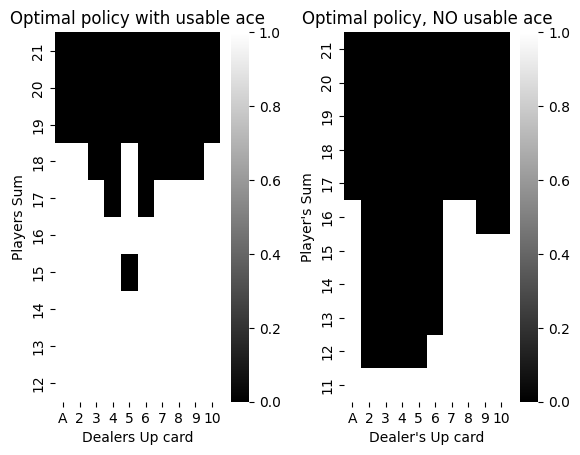

In [7]:
plot_policies(hm,nhm)

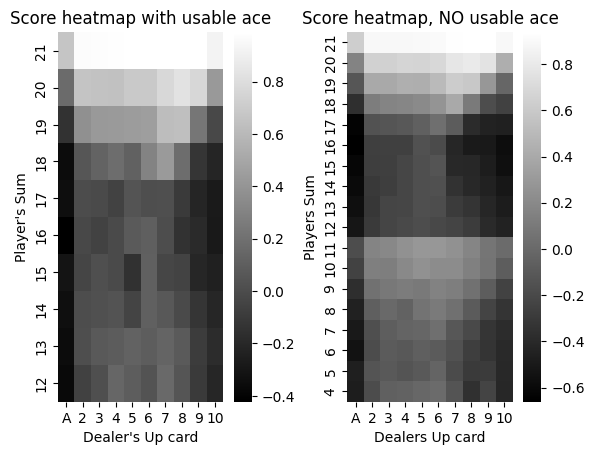

In [8]:
plot_state_values(hc,nhc)

## Comparing with the optimal policy as presented in Sutton et al.

<div style="background-color: #F0F0F0; padding: 10px; width:auto">
    <img src='https://hollygrimm.com/sites/default/files/inline-images/suttonfig5.5_0.png'>
</div>

Comparing with the results presented in the book by [Sutton et al.](http://incompleteideas.net/book/RLbook2020.pdf#%5B%7B%22num%22%3A1429%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C79.2%2C497.37%2Cnull%5D) 
 it can be concluded that MC control algorithm converged to the optimal policy for Gym Blackjack environment

---

 # EOD